<a href="https://colab.research.google.com/github/sakshamshil/Machine-Learning-Projects/blob/main/3_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting house prices by training a model with given dataset**:

WORKFLOW

House Price Data -> Data Pre Processing -> Data Analysis -> Train Test Split -> XGBoost Regressor -> Evaluation

XGBoost Regressor is a Decision tree kind of algorithm for regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing Boston House Price Dataset

In [ ]:
house_price_dataset = sklearn.datasets.fetch_california_housing()
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)         #loading the dataset into a pandas datafram

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#add the target column to the Dataframe
house_price_dataframe['Price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
house_price_dataframe.shape

(20640, 9)

In [ ]:
#check for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

Luckily in this data there are no missing values, so no need to fill those

In [ ]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


###**Understanding the correlation between various features in the dataset**

1. Positive Correlation : If one variable increases, the other variable also increases

2. Negative Correlation : If one variable increases, the other variable decreases


In [ ]:
correlation = house_price_dataframe.corr()

**Making a heatmap to understand the correlation**

<Axes: >

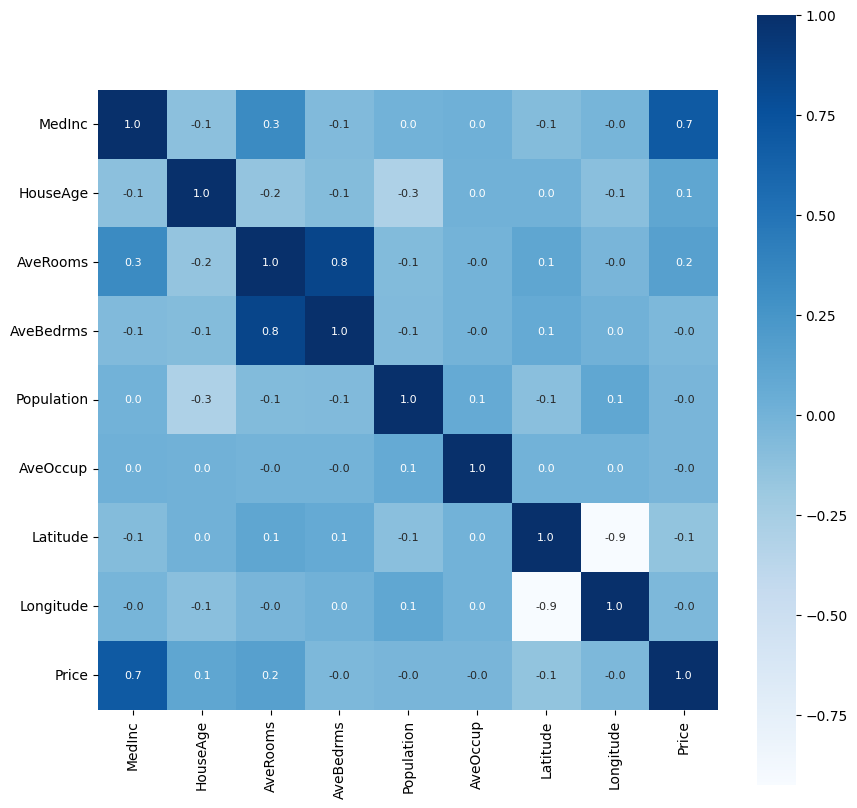

In [ ]:
#plotting using plt & sns
plt.figure(figsize = (10,10))
#creates a figure of 10,10 size to fit the heatmap
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')
#cbar = true -> display colour bar(the bar at the right)
#square = true -> all values mentioned in the square
#fmt -> how many float values we want, .1f = 1 value after decimal point
#annot -> If True, write the data value in each cell
#cmap -> Blueish colour

###Seperate data into features and labels

In [ ]:
X = house_price_dataframe.drop(['Price'], axis = 1)
Y = house_price_dataframe['Price']

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [ ]:
print (X.shape, Y.shape)

(20640, 8) (20640,)


####Splitting data into training and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size = 0.2,  random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


#MODEL TRAINING Using XGBoost Regressor


XGBoost Regressor is a decision tree ensemble model (using more than 1 models)

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation, unlike logisitic regression we cannot find the accuracy score, so here we will find other different metrics

In [ ]:
training_prediction = model.predict (X_train)

In [ ]:
training_prediction

array([0.6893792 , 2.986824  , 0.48874274, ..., 1.8632544 , 1.7800125 ,
       0.7565893 ], dtype=float32)

In [ ]:
#R squared error and Mean absolute error are good metric to check for accuracy in regression
score_1 = metrics.r2_score(Y_train, training_prediction)
#r squared function is the proportion of variances, range from 0 to 1 and are commonly stated as percentages from 0% to 100%

score_2 = metrics.mean_absolute_error(Y_train, training_prediction)

In [ ]:
print("R Squared error : ", score_1)
print("Mean absolute error : ", score_2)

R Squared error :  0.9451221492760822
Mean absolute error :  0.1919170860794262


##Visualizing the actual prices and predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

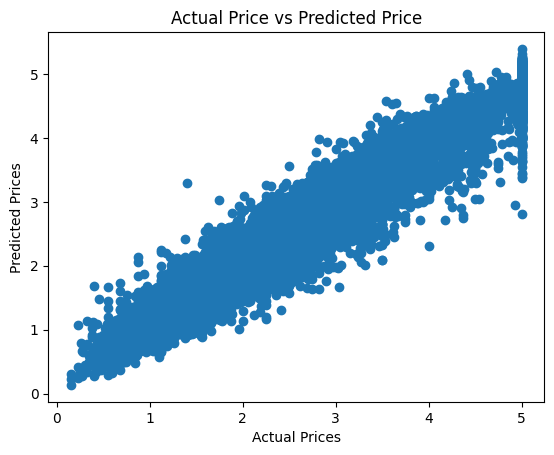

In [ ]:
plt.scatter(Y_train, training_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
test_prediction = model.predict (Xtest)

In [ ]:
#Accuracy for test data

scoretest_1 = metrics.r2_score(Y_test, test_prediction)

scoretest_2 = metrics.mean_absolute_error(Y_test, test_prediction)

print("R Squared error : ", scoretest_1)
print("Mean absolute error : ", scoretest_2)

R Squared error :  0.8412904408180302
Mean absolute error :  0.30753655785801337


XGBoost Regressor is a powerful tool for predicting things like house prices. It combines the opinions of many simple predictors to give a more accurate prediction. Each new predictor learns from the mistakes of the previous ones, adjusting its predictions to get better and better results. This teamwork and learning process make it really good at making predictions, even for complex problems like predicting house prices.